# K-mean



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader

# Generate a simple 2D dataset with 4 clusters manually
np.random.seed(42)

# Define cluster centers
centers = np.array([[-8, 8], [-5, -5], [5, 5], [8, -8]])

# Generate points around each center
num_samples_per_cluster = 250
cluster_std = 1.5  # Standard deviation of clusters

X_manual = []
y_manual = []

for i, center in enumerate(centers):
    points = np.random.randn(num_samples_per_cluster, 2) * cluster_std + center
    X_manual.append(points)
    y_manual.extend([i] * num_samples_per_cluster)

# Convert lists to NumPy arrays
X_manual = np.vstack(X_manual)
y_manual = np.array(y_manual)

# Create a dropdown widget for selecting number of clusters
n_clusters_widget = widgets.IntSlider(
    value=1,
    min=1,
    max=10,
    step=1,
    description='n_clusters:',
    continuous_update=False
)

def update_kmeans(n_clusters):
    """Function to update KMeans clustering with user-selected n_clusters"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    predicted_labels = kmeans.fit_predict(X_manual)

    # Plot the clustered dataset
    plt.figure(figsize=(6, 6))
    plt.scatter(X_manual[:, 0], X_manual[:, 1], c=predicted_labels, cmap='viridis', s=10)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title(f"K-Means Clustering with {n_clusters} Clusters")
    plt.legend()
    plt.show()

# Display the widget and update function
widgets.interactive(update_kmeans, n_clusters=n_clusters_widget)

interactive(children=(IntSlider(value=1, continuous_update=False, description='n_clusters:', max=10, min=1), O…

# K-mean in images

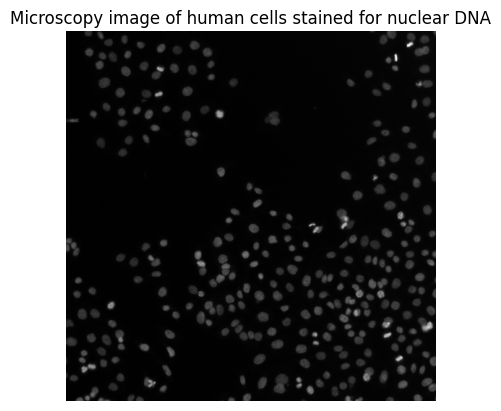

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

import skimage as ski

image = ski.data.human_mitosis()

fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
ax.set_title('Microscopy image of human cells stained for nuclear DNA')
ax.set_axis_off()
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display

# Load and reshape the image
def process_image(K):
    img = ski.data.human_mitosis()
    X = img

    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # Replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]

    # Reshape and display output image
    # img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img4, interpolation='nearest')
    plt.axis('off')
    plt.show()

# Create an interactive widget to adjust K
display(widgets.interactive(process_image, K=widgets.IntSlider(min=1, max=500, step=1, value=2, description='K Clusters')))


interactive(children=(IntSlider(value=2, description='K Clusters', max=500, min=1), Output()), _dom_classes=('…

--2025-02-24 14:54:23--  https://drive.google.com/uc?export=download&id=1jUNdh197wYL7vPGQ8UzvyqbxLvc0pCCI
Resolving drive.google.com (drive.google.com)... 142.250.141.101, 142.250.141.100, 142.250.141.138, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jUNdh197wYL7vPGQ8UzvyqbxLvc0pCCI&export=download [following]
--2025-02-24 14:54:23--  https://drive.usercontent.google.com/download?id=1jUNdh197wYL7vPGQ8UzvyqbxLvc0pCCI&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324671 (317K) [image/jpeg]
Saving to: ‘girl.jpg’

girl.jpg            100%[===================>] 317.06K  --.-KB/s    in 0.07s   

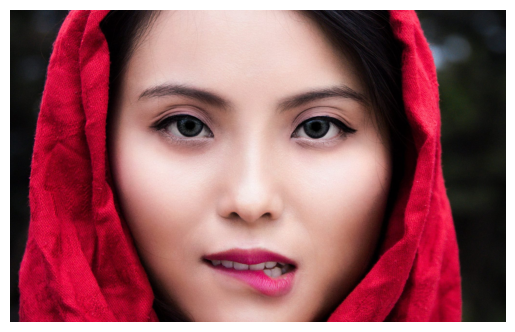

In [ ]:
# prompt: write code to download this image from this link: https://drive.google.com/file/d/1jUNdh197wYL7vPGQ8UzvyqbxLvc0pCCI/view?usp=sharing

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1jUNdh197wYL7vPGQ8UzvyqbxLvc0pCCI' -O girl.jpg
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread('girl.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display

# Load and reshape the image
def process_image(K):
    img = mpimg.imread('girl.jpg')
    X = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))

    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # Replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]

    # Reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

# Create an interactive widget to adjust K
display(widgets.interactive(process_image, K=widgets.IntSlider(min=1, max=20, step=1, value=2, description='K Clusters')))


interactive(children=(IntSlider(value=2, description='K Clusters', max=20, min=1), Output()), _dom_classes=('w…

# work with happy face


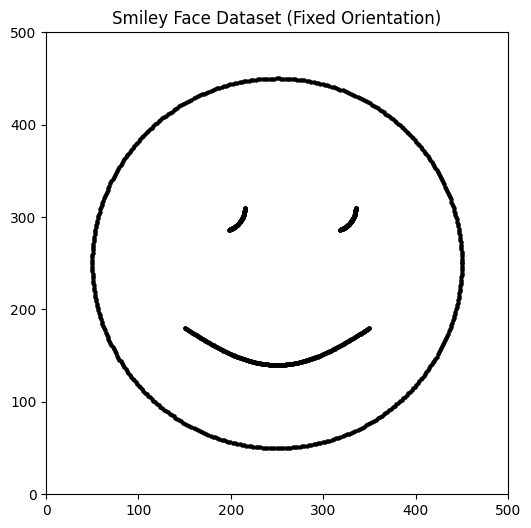

In [ ]:
# Generate a dataset with points forming a correctly oriented smiley face
num_points = 1000

# Face (Circle)
theta = np.linspace(0, 2 * np.pi, num_points // 2)
face_x = 250 + 200 * np.cos(theta)
face_y = 250 - 200 * np.sin(theta)  # Flip vertically
face = np.column_stack((face_x, face_y))

# Eyes (Two small circles)
eye_radius = 25
eye_left_x = 190 + eye_radius * np.cos(theta[:num_points // 10])
eye_left_y = 310 - eye_radius * np.sin(theta[:num_points // 10])  # Flip vertically
eye_left = np.column_stack((eye_left_x, eye_left_y))

eye_right_x = 310 + eye_radius * np.cos(theta[:num_points // 10])
eye_right_y = 310 - eye_radius * np.sin(theta[:num_points // 10])  # Flip vertically
eye_right = np.column_stack((eye_right_x, eye_right_y))

# Mouth (Arc for the smile)
smile_theta = np.linspace(0, np.pi, num_points // 4)
smile_x = 150 + 200 * smile_theta / np.pi  # Map x from 150 to 350
smile_y = 180 - 40 * np.sin(smile_theta)  # Flip mouth to make a smile
smile = np.column_stack((smile_x, smile_y))

# Combine all parts
smiley_face_data = np.vstack((face, eye_left, eye_right, smile))

# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(smiley_face_data[:, 0], smiley_face_data[:, 1], s=5, color='black')
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Smiley Face Dataset (Fixed Orientation)")
plt.show()


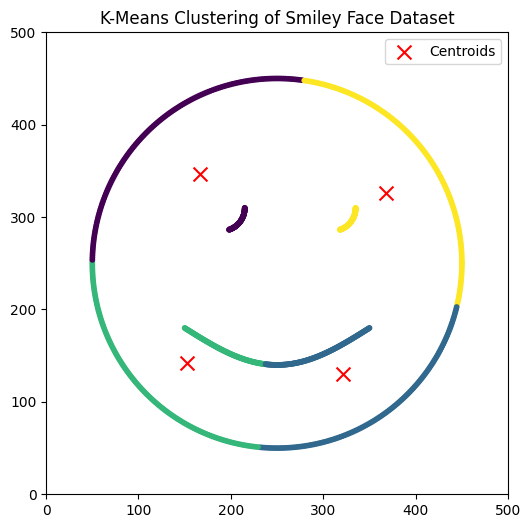

In [ ]:
from sklearn.cluster import KMeans

# Define the number of clusters (segments)
num_clusters = 4  # Face, Left Eye, Right Eye, Mouth

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(smiley_face_data)

# Plot the clustered dataset
plt.figure(figsize=(6, 6))
plt.scatter(smiley_face_data[:, 0], smiley_face_data[:, 1], c=labels, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("K-Means Clustering of Smiley Face Dataset")
plt.legend()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import ipywidgets as widgets
from IPython.display import display

# Define an adjustable neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No softmax needed, as CrossEntropyLoss includes it
        return x

# Create widgets for user input
hidden1_size = widgets.IntSlider(min=2, max=512, step=2, value=64, description='Hidden 1')
hidden2_size = widgets.IntSlider(min=2, max=512, step=2, value=32, description='Hidden 2')

# Function to create and display the model
model = 0
def create_model(hidden1, hidden2):
    global model
    model = SimpleNN(input_size=2, hidden1_size=hidden1, hidden2_size=hidden2, output_size=3)
    print(model)

# Display the form
ui = widgets.VBox([hidden1_size, hidden2_size])
out = widgets.interactive_output(create_model, {'hidden1': hidden1_size, 'hidden2': hidden2_size})
display(ui, out)


Output()

Epoch 0, Loss: 1.1079
Epoch 100, Loss: 0.2038
Epoch 200, Loss: 0.7344
Epoch 300, Loss: 0.6018
Epoch 400, Loss: 0.0464
Epoch 500, Loss: 0.1755
Epoch 600, Loss: 0.0591
Epoch 700, Loss: 0.0085
Epoch 800, Loss: 0.0161
Epoch 900, Loss: 0.0009


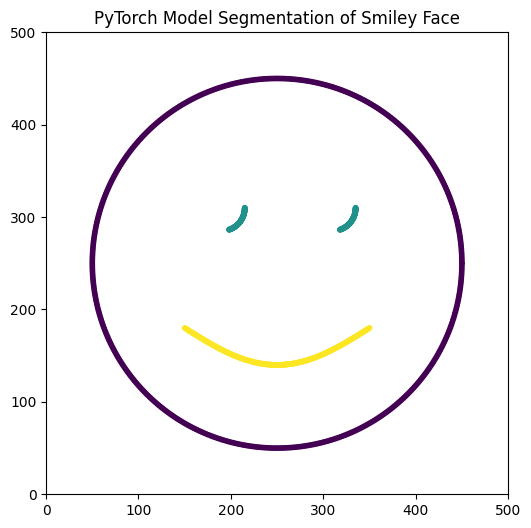

In [ ]:

# Generate synthetic data (Smiley face dataset)
num_points = 1000

# Face (Circle)
theta = np.linspace(0, 2 * np.pi, num_points // 2)
face_x = 250 + 200 * np.cos(theta)
face_y = 250 - 200 * np.sin(theta)  # Flip vertically
face = np.column_stack((face_x, face_y))
face_labels = np.zeros(face.shape[0])  # Label 0 for the face

# Eyes (Two small circles)
eye_radius = 25
eye_left_x = 190 + eye_radius * np.cos(theta[:num_points // 10])
eye_left_y = 310 - eye_radius * np.sin(theta[:num_points // 10])  # Flip vertically
eye_left = np.column_stack((eye_left_x, eye_left_y))
eye_right_x = 310 + eye_radius * np.cos(theta[:num_points // 10])
eye_right_y = 310 - eye_radius * np.sin(theta[:num_points // 10])  # Flip vertically
eye_right = np.column_stack((eye_right_x, eye_right_y))
eyes = np.vstack((eye_left, eye_right))
eye_labels = np.ones(eyes.shape[0])  # Label 1 for the eyes

# Mouth (Arc for the smile)
smile_theta = np.linspace(0, np.pi, num_points // 4)
smile_x = 150 + 200 * smile_theta / np.pi  # Map x from 150 to 350
smile_y = 180 - 40 * np.sin(smile_theta)  # Flip mouth to make a smile
smile = np.column_stack((smile_x, smile_y))
smile_labels = np.full(smile.shape[0], 2)  # Label 2 for the mouth

# Combine all parts
X = np.vstack((face, eyes, smile))
y = np.hstack((face_labels, eye_labels, smile_labels))

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 1000
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


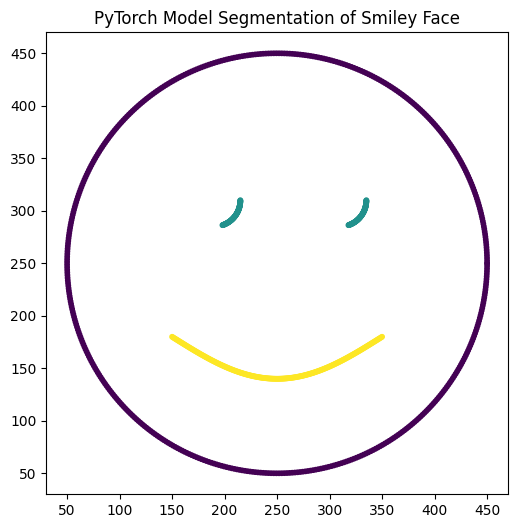

In [ ]:
# Predict on the dataset
with torch.no_grad():
    predictions = model(X_tensor)
    predicted_labels = torch.argmax(predictions, axis=1).numpy()

# Plot the segmentation result
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', s=10)
# plt.xlim(0, 500)
# plt.ylim(0, 500)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("PyTorch Model Segmentation of Smiley Face")
plt.show()

In [ ]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,